<a href="https://colab.research.google.com/github/ReneViana/web-screping-teste/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [ ]:
from bs4 import BeautifulSoup as bs
import requests as rq
import re


In [122]:
!pip install selenium
!apt-get update # https://youtu.be/VdwcTlQRt7w?t=330
!apt install chromium-chromedriver

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
import time
from datetime import datetime
import re
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

## HTML site

In [ ]:
html_completo = rq.get("https://webscraping.andreregino.com.br/") 
html_formatado = bs(html_completo.content)
print(html_formatado.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   E-book Git e GitHub - Seu Código Versionado
  </title>
  <!-- Meta -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="E-book Git e GitHub - Seu Código Versionado" name="description"/>
  <meta content="André Gomes Regino" name="author"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <!-- Google Font -->
  <link href="https://fonts.googleapis.com/css?family=Quicksand:700|Roboto:400,400i,700&amp;display=swap" rel="stylesheet"/>
  <!-- FontAwesome JS-->
  <script defer="" src="assets/fontawesome/js/all.min.js">
  </script>
  <!-- Theme CSS -->
  <link href="assets/css/theme.css" id="theme-style" rel="stylesheet"/>
 </head>
 <body>
  <header class="header">
   <div class="branding">
    <div class="container-fluid position-relative py-3">
    </div>
    <!--//container-->
   </div>
   <!--//branding-->
  </h

In [ ]:
primeiro_h2 = (html_formatado.find("h2")).text
print(primeiro_h2)

Para que aprender Git?


In [ ]:
todas_h2 = (html_formatado.find_all("h2"))
print(todas_h2)

[<h2 class="section-heading text-center mb-3">Para que aprender Git?</h2>, <h2 class="section-heading text-center mb-3">Para que aprender GitHub?</h2>, <h2 class="section-heading text-center mb-3">Quais os Benefícios deste E-book?</h2>, <h2 class="section-heading text-center mb-5">Quais os Tópicos?</h2>, <h2 class="section-heading text-center mb-5">Quais os Tópicos?</h2>, <h2 class="section-heading text-center mb-4">Para Quem é Esse Livro</h2>, <h2 class="form-heading text-center">Quais os Pré Requisitos</h2>, <h2 class="section-heading text-center">Reviews</h2>, <h2 class="section-heading text-center text-white mb-3">Sobre o Autor</h2>, <h2 class="section-heading text-center mb-5">Investimento</h2>]


In [ ]:
todas_h2 = html_formatado.find_all(["h2","h1"])
for ocorrencia_h2 in todas_h2:
  print(ocorrencia_h2.text)


						    E-book Git e GitHubSeu Código Versionado
					    
Para que aprender Git?
Para que aprender GitHub?
Quais os Benefícios deste E-book?
Quais os Tópicos?
Quais os Tópicos?
Para Quem é Esse Livro
Quais os Pré Requisitos
Reviews
Sobre o Autor
Investimento
4x de R$9,90


## Pegando Conteúdo usando Classes e IDs

In [ ]:
preco = html_formatado.find_all(class_="card-title pricing-card-title")
print(preco)
requisito = html_formatado.find(id="pre-requisite-section")
print(requisito)

[<h1 class="card-title pricing-card-title"><small class="text-muted">4x de </small><span style="color: green">R$9,90</span></h1>]
<section class="pre-requisite-section" id="pre-requisite-section">
<div class="container">
<div class="lead-form-wrapper single-col-max mx-auto theme-bg-light rounded p-5">
<h2 class="form-heading text-center">Quais os Pré Requisitos</h2>
<div class="form-intro text-center mb-3">Nenhum, somente sua vontade de aprender.</div>
</div><!--//lead-form-wrapper-->
</div><!--//container-->
</section>


## Pegando Conteúdo com filtro de Texto

In [ ]:
todas_h2 = html_formatado.find_all(["h2","h1"], text="Reviews")
for ocorrencia_h2 in todas_h2:
  print(ocorrencia_h2.text)

Reviews


In [ ]:
todas_h2 = html_formatado.find_all(["h2","h1"], text=re.compile("Para que"))
for ocorrencia_h2 in todas_h2:
  print(ocorrencia_h2.text)

Para que aprender Git?
Para que aprender GitHub?


In [ ]:
botao = html_formatado.find(class_="price").a
print(botao['href'])

https://payment.hotmart.com/R54638781B?checkoutMode=10


In [ ]:
imagemcapa = html_formatado.find("img")
print(imagemcapa['src'])

assets/images/capa-ebook-git-github.png


In [ ]:
elemento_lista = html_formatado.find("section", class_='content-section').ul.li
print(elemento_lista)

<li><i class="fas fa-check-circle mr-2"></i>Instalação do Git e Criação de Conta no GitHub</li>


In [ ]:
quarto_li = html_formatado.select(".content-section ul li:nth-of-type(3)")
print(quarto_li)

[<li><i class="fas fa-check-circle mr-2"></i>Receber, Enviar, Verificar e Resetar Modificações de Código</li>]


## Scraping Amazon

In [ ]:
HEADERS = ({'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'})
projeto_amazon = rq.get("https://www.amazon.com.br/Echo-Dot-3%C2%AA-Gera%C3%A7%C3%A3o-Cor-Preta/dp/B07PDHSJ1H/ref=zg-bs_electronics_1/145-1781600-4843713?pd_rd_w=wDj8n&pf_rd_p=c0c0f25f-aaf5-43d0-b46e-c8c2c04a86c2&pf_rd_r=811SVZYZS8RTC0GQAYV3&pd_rd_r=6249e2a9-1495-4058-bda3-b85c5d0996b4&pd_rd_wg=9dtgB&pd_rd_i=B07PDHSJ1H&psc=1", headers=HEADERS) 
amazon = bs(projeto_amazon.content)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="pt-br"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.pu
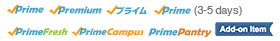

In [ ]:
print(amazon.prettify)

In [ ]:
from typing import Text
valor = amazon.find(class_="a-offscreen").get_text().strip()
valor = (valor[2:])
print(valor)

189,05


## Seleniun

# Nova seção

In [134]:
url = "http://www.fsma.edu.br/si/edicao7/FSMA_SI_2011_1_Tutorial_1.pdf"
wd.get(url)

csv = wd.find_element_by_xpath("/html/body/pdf-viewer//viewer-toolbar//div/div[3]/viewer-download-controls//cr-icon-button")
csv.click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  after removing the cwd from sys.path.


NoSuchElementException: ignored